In [1]:
###importaciones
###aquí se hacen las importaciones necesarias para entrenar y crear los modelos, cada uno cumple una función.
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import category_encoders
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import joblib

In [2]:
##lectura del csv y objetos a usar
##Aquí se carga el archivo con los datos por medio de la librería Pandas, usando el comando read_csv, el cual es la extensión del archivo y a su vez se le agrega a una variable llamada data.
data=pd.read_csv('Historial caliente.csv')
##Aquí de asignan los objetos como label encoder y el árbol de decisiones a una variable con un nombre más corto, con el fin de hacer la programación más amena. 
le=LabelEncoder()
dt=DecisionTreeClassifier()
##Aquí sólo se llama a la variable data y al eecutarlo se mostrará su contenido. 
data

,Estatus,FECHA_ALTA,IdMaterial,NECESIDAD_ORIGEN,ACEROOrigen,C_ACEROOrigen,NECESIDAD_DESTINO,ACERODestino,C_ACERODestino,PRO_ORIGEN,...,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion,Pedido
0,Rechazado,12/08/2017 05:27,3A625045CC401,3001374950,C091TM,SS,3001554792,C091TM,SS,MP509076,...,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,OK,1
1,Rechazado,21/06/2016 02:14,3A495012CM300,3001146303,C091TM,SS,3001165189,C091TM,SS,MP502062,...,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,OK,1
2,Rechazado,05/07/2016 12:20,2A329680GC100,3001078736,C091TM,SS,3001183132,C091TM,SS,MP502062,...,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,OK,1
3,Rechazado,05/07/2016 12:48,1A133785GM100,3000884287,C091TM,SS,3001183132,C091TM,SS,MP502062,...,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,OK,1
4,Rechazado,05/07/2016 12:48,2A365429GM200,3000884287,C091TM,SS,3001183132,C091TM,SS,MP502062,...,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,OK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,OK,31/07/2017 15:53,2A476991GS100,3001389689,7092,CS,3001389348,C091TM,SS,MP509076,...,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,Rechazado,1
4728,OK,31/07/2017 15:54,3A616779CS401,3001389689,7092,CS,3001389348,C091TM,SS,MP509076,...,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,Rechazado,1
4729,OK,31/07/2017 15:53,2A476992GS100,3001389689,7092,CS,3001389348,C091TM,SS,MP509076,...,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,Rechazado,1
4730,OK,31/07/2017 15:52,2A465682GS100,3001389689,7092,CS,3001389348,C091TM,SS,MP509076,...,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,Rechazado,1


In [3]:
###limpieza de datos
##Se crea una variable "de" la cual será llamada cuando se use el comando drop
##ésta variable contiene las columnas que no se utilizarán en el analítico. 
de=['Estatus', 'FECHA_ALTA', 'IdMaterial', 'NECESIDAD_ORIGEN','NECESIDAD_DESTINO', 'PRO_ORIGEN', 
    'PRO_DESTINO', 'SAME_PRO', 'Pedido', 'C_ACERODestino','C_ACEROOrigen','CCLASEPRODTODestino','CCLASEPRODTOOrigen']
##Se crea una nueva variable para datos, se mete la variable data pero se le aplica el comando drop
##el cual en conjunto con la variable de desecahrá las columnas que contiene la variable. 
datac=data.drop(de,axis=1)
datac

,ACEROOrigen,ACERODestino,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,...,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion
0,C091TM,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,OK
1,C091TM,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,OK
2,C091TM,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,OK
3,C091TM,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,OK
4,C091TM,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,7092,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,Rechazado
4728,7092,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,Rechazado
4729,7092,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,Rechazado
4730,7092,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,Rechazado


In [4]:
##Aquí se utiliza la función de pandas "dataframe" para convertir el csv a un dataframe de pandas.  
main_df=datac
main_df=pd.DataFrame(data=main_df)
print(main_df.head(10))

  ACEROOrigen ACERODestino BORDESOrigen  DIAM__INTERNOOrigen  \
0      C091TM       C091TM   LAMINACION                  711   
1      C091TM       C091TM   LAMINACION                  711   
2      C091TM       C091TM   LAMINACION                  711   
3      C091TM       C091TM   LAMINACION                  711   
4      C091TM       C091TM   LAMINACION                  711   
5      C091TM       C091TM   LAMINACION                  711   
6      C091TM       C091TM   LAMINACION                  711   
7      C091TM       C091TM   LAMINACION                  711   
8      C091TM       C091TM   LAMINACION                  711   
9      C091TM       C091TM   LAMINACION                  711   

                EXTREMOSOrigen                  NORMAOrigen  \
0  NO CORTADOS 98% EN ESPESOR.  TER \ PER-GA (V 2006 REV 1)   
1  NO CORTADOS 98% EN ESPESOR.  TER \ PER-GA (V 2006 REV 1)   
2  NO CORTADOS 98% EN ESPESOR.  TER \ PER-GA (V 2006 REV 1)   
3  NO CORTADOS 98% EN ESPESOR.  TER \ PER-G

In [1]:
## esto es solo para apoyarnos y sacar los nombres de las columnas.
main_df.columns

NameError: name 'main_df' is not defined

In [6]:
## aquí se utiliza le, el cual es Label Encoder (objeto que se asignó en el segundo bloque)
##y este lo utilizamos para encodificar la variable objetivo, por lo cual OK y RECHAZADO se convierten a 1 y 0
##pero esto es sólo el entrenamiento de ese objeto, por eso sólo se usa el comando fit.
encobj=le.fit(main_df['Reasignacion'])

In [7]:
###codificación de variable objetivo usando LE
##aquí ya se utiliza el comando transform para hacer la codificación
main_df.Reasignacion=encobj.transform(main_df['Reasignacion'])
## al aplicarse sobre la misma variable que contenía el dataframe 
## obtenemos que la columna de Reasignación (variable objetivo) ahora está codificada en 1 y 0.
main_df

,ACEROOrigen,ACERODestino,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,...,DIAM__INTERNODestino,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion
0,C091TM,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,0
1,C091TM,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,0
2,C091TM,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,0
3,C091TM,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,0
4,C091TM,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,7092,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,1
4728,7092,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,1
4729,7092,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,1
4730,7092,C091TM,LAMINACION,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,...,711,NO CORTADOS 98% EN ESPESOR.,TER \ PER-GA (V 2006 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,INTERNA,TUBOS Y PERFILES,1


In [46]:
##Aquí se crea un .pkl (el cual es como un ejecutable) con el encodificado entrenado para un uso futuro. 
joblib.dump(encobj,'EncodificacionObjetivo.pkl')

['EncodificacionObjetivo.pkl']

In [8]:
###Variable objetivo
##aquí separamos la variable objetivo y creamos un data frame a partir de ella.
target_df = pd.DataFrame(main_df, columns=['Reasignacion'])
print(target_df.sample(10))

      Reasignacion
1443             0
3779             1
1280             0
3495             1
2407             0
81               0
4254             1
189              0
4199             1
1722             0


In [9]:
##creación de dataset encodificado
## Como ya se creo un data frame con la variable objetivo 
##ésta se eliminará del dataframe que contienen los datos para el analítico. 
main_df=main_df.drop(['Reasignacion'],axis=1)


In [10]:
####encodifiación de atributos usando target
##Ahora usando Target encoder, dentro de una variable llamada enc, encodificamos los datos del analítico
##introduciendo las columnas a codificar, poniendo los argumentos como handle_unknown 
##para que los valores desconocidos no sean un problema. 
##y al final se introduce el fit para entrenar al codificador con el main df como eje X (datos)
##y el target df como eje Y(objetivo).
main_df.columns = main_df.columns.str.strip()
target_df.columns = target_df.columns.str.strip()
enc=category_encoders.target_encoder.TargetEncoder(verbose=0,cols=['ACEROOrigen', 'ACERODestino', 'BORDESOrigen',
       'EXTREMOSOrigen', 'NORMAOrigen', 'NORTOLANCHOOrigen',
       'NORTOLESPESOROrigen', 'PLANITUDOrigen', 'SOLDAOrigen',
       'SUPERFICIEOrigen', 'USOGRALOrigen', 'BORDESDestino',
       'EXTREMOSDestino', 'NORMADestino',
       'NORTOLANCHODestino', 'NORTOLESPESORDestino', 'PLANITUDDestino',
       'SOLDADestino', 'SUPERFICIEDestino', 'USOGRALDestino'],drop_invariant=False, return_df=True, handle_unknown='value',handle_missing='value',min_samples_leaf=1,smoothing=1.0).fit(main_df,target_df)

In [52]:
##aquí se crea el primer pkl que necesitaremos en cada modelo, y es un pkl de la codificación de los datos de entrenamiento
##para utilizar la misma encodificación en cada análisis de nuevos datos.
joblib.dump(enc,'TargetCaliente.pkl')

['TargetCaliente.pkl']

In [2]:
##usamos la variable enc con el comando transform para codificar el maindf 
##y que los datos sean números, de tal forma que el algoritmo pueda entender todo.
codi=enc.transform(main_df)
codi

NameError: name 'enc' is not defined

###declaración de variable x (atributos)
##aquí sólo se crea X con los datos ya convertidos.
X=codi
X

In [12]:
###declaración de y (objetivo)
##Aquí se crea Y con los datos objetivo codificados.
y=target_df
y

,Reasignacion
0,0
1,0
2,0
3,0
4,0
...,...
4727,1
4728,1
4729,1
4730,1


In [15]:
##división de datos 
##Se utiliza la función train_test_split con las variables anteriormente creadas(X,y)
##para hacer una división aleatoria de los datos de tal forma que unos se usen para apreder 
##y otros para hacer una especie de examen y comprobar que tan bien aprendió el modelo
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [20]:
##entrenamiento
##se utiliza la variable dt (el arbol de decisiones) con el comando fit para entrenarlo, usando X_train & y_train.
dt=DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [21]:
###prueba score
##Se prueba el aprendizaje del modelo con la función score y las variables X_test & y_test (Examen)
dt.score(X_test,y_test)

0.8655959425190194

In [58]:
##Para finalizar se crea el segundo PKL que se usará en cada modelo,
##y éste es el pkl del árbol de decisiones ya entrenado en éste proceso de reasignación. 
##de tal manera que por cada proceso de reasignación tendremos 2 pkl, 
##uno para encodificar y otro para analizar los datos y hacer las predicciones. 
joblib.dump(dt,'ModeloCaliente.pkl')

['ModeloCaliente.pkl']

In [34]:
##Se crea una variable con los nombres de las variables objetivo
nombres=['OK','RECHAZADO']

In [35]:
##exportación y render
##Usando graphviz  podemos exportar el modelo que creamos como un pdf para así visualizarlo,
##esto es un paso extra y no es necesario para crear o modificar el modelo, sin embargo, te da una perspectiva de qué se creó. 
dot_data=export_graphviz(dt,feature_names= X.columns, class_names=nombres, impurity=False, filled=True)
graph=graphviz.Source(dot_data)
graph.render('ModeloCaliente')

'ModeloCaliente.pdf'

Text(0.5, 0, 'Importancia')

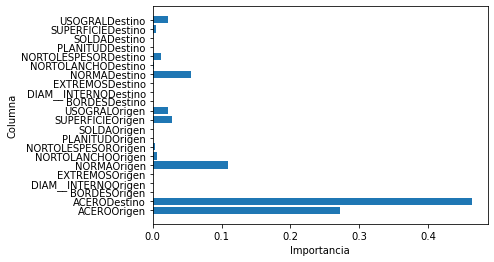

In [22]:
carac=main_df.shape[1]
plt.barh(range(carac),dt.feature_importances_)
plt.yticks(np.arange(carac),X.columns)
plt.ylabel('Columna')
plt.xlabel('Importancia')